## IoU YOLO model evaluation

In [60]:
import torch
from torchvision import ops
from ultralytics import YOLO
import os, matplotlib.pyplot as plt
import cv2
torch.__version__

'2.4.1+cu118'

In [62]:
model_name = 'best.pt'
model_it = 2
MODEL_PATH = f'./colab notebook/runs/detect/train{model_it}/weights/{model_name}'

# model = torch.load(MODEL_PATH)
model = YOLO(MODEL_PATH)
model

In [ ]:
def detect_bounding_ground_truth(label_path, img_path):
    bounding_box_temp=[]
    with open(label_path, "r") as file:
        r = [line.strip() for line in file]
        for i in range(r.__len__()):
            print("f",i, f[i])
            f = r[i].split(" ")

            img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
            height, width, _ = img.shape

            # Convert normalized coordinates to pixel values
            x_center = float(f[1]) * width
            y_center = float(f[2]) * height
            box_width = float(f[3]) * width
            box_height = float(f[4]) * height
            print(x_center, y_center, box_width, box_height)

            # Calculate top-left and bottom-right corners of the bounding box
            x1 = int(x_center - box_width / 2)
            y1 = int(y_center - box_height / 2)
            x2 = int(x_center + box_width / 2)
            y2 = int(y_center + box_height / 2)
            bounding_box_temp.append([x1, y1, x2, y2])

    # Combine all bounding boxes into one rectangle
    x1_combined = min(box[0] for box in bounding_box_temp)
    y1_combined = min(box[1] for box in bounding_box_temp)
    x2_combined = max(box[2] for box in bounding_box_temp)
    y2_combined = max(box[3] for box in bounding_box_temp)

    # Draw the combined bounding box
    img_ground_truth = img.copy()
    cv2.rectangle(img_ground_truth, (x1_combined, y1_combined), (x2_combined, y2_combined), (255, 0, 0), 2)

    # Visualize the image
    plt.imshow(img_ground_truth)
    plt.axis("off")
    plt.show()

    # Ground truth tensor (if needed)
    ground_truth = torch.tensor([[x1_combined, y1_combined, x2_combined, y2_combined]])
    print("Combined bounding box:", [x1_combined, y1_combined, x2_combined, y2_combined])
    return ground_truth

def detect_bounding_box_predict(img_path):
    results = model.predict(img_path)
    for result in results:
        boxes = result.boxes.xyxy
        pred_box = torch.tensor([[boxes[0][0], boxes[0][1], boxes[0][2], boxes[0][3]]])
        print(boxes)
        return pred_box

f 0 3
236.0 134.0 184.5 177.5
f 1 0.5673076923076923
143.0 226.99999999999997 165.5 282.5


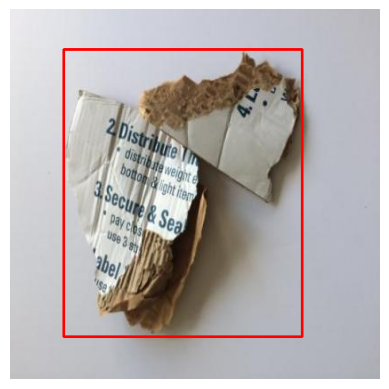

Combined bounding box: [60, 45, 328, 368]


In [128]:
img_name = "cardboard153_jpg.rf.47d511aa97f700d8bdcbf7ce5f3a2219"
LABEL_PATH = f'./MaterialRecognitionDataset/test/labels/{img_name}.txt'
IMG_PATH = f'./MaterialRecognitionDataset/test/images/{img_name}.jpg'
bounding_box_temp=[]

with open(LABEL_PATH, "r") as file:
    r = [line.strip() for line in file]
    for i in range(r.__len__()):
        print("f",i, f[i])
        f = r[i].split(" ")

        img = cv2.cvtColor(cv2.imread(IMG_PATH), cv2.COLOR_BGR2RGB)
        height, width, _ = img.shape

        # Convert normalized coordinates to pixel values
        x_center = float(f[1]) * width
        y_center = float(f[2]) * height
        box_width = float(f[3]) * width
        box_height = float(f[4]) * height
        print(x_center, y_center, box_width, box_height)

        # Calculate top-left and bottom-right corners of the bounding box
        x1 = int(x_center - box_width / 2)
        y1 = int(y_center - box_height / 2)
        x2 = int(x_center + box_width / 2)
        y2 = int(y_center + box_height / 2)
        bounding_box_temp.append([x1, y1, x2, y2])

# Combine all bounding boxes into one rectangle
x1_combined = min(box[0] for box in bounding_box_temp)
y1_combined = min(box[1] for box in bounding_box_temp)
x2_combined = max(box[2] for box in bounding_box_temp)
y2_combined = max(box[3] for box in bounding_box_temp)

# Draw the combined bounding box
img_ground_truth = img.copy()
cv2.rectangle(img_ground_truth, (x1_combined, y1_combined), (x2_combined, y2_combined), (255, 0, 0), 2)

# Visualize the image
plt.imshow(img_ground_truth)
plt.axis("off")
plt.show()

# Ground truth tensor (if needed)
ground_truth = torch.tensor([[x1_combined, y1_combined, x2_combined, y2_combined]])
print("Combined bounding box:", [x1_combined, y1_combined, x2_combined, y2_combined])


In [99]:
results = model.predict(IMG_PATH)
for result in results:
    boxes = result.boxes.xyxy
    pred_box = torch.tensor([[boxes[0][0], boxes[0][1], boxes[0][2], boxes[0][3]]])
    print(boxes)


image 1/1 c:\Users\tyogo\OneDrive - Bina Nusantara\Semester 5\COMP_Computer Vision\Final Project\MaterialRecognitionDataset\test\images\cardboard153_jpg.rf.47d511aa97f700d8bdcbf7ce5f3a2219.jpg: 256x256 1 paper, 101.9ms
Speed: 1.5ms preprocess, 101.9ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 256)
tensor([[ 56.5961,  39.2855, 331.5437, 370.0975]])


ground truth: tensor([[ 60,  45, 328, 368]])
predicted:    tensor([[ 56.5961,  39.2855, 331.5437, 370.0975]])
95.17129063606262 %


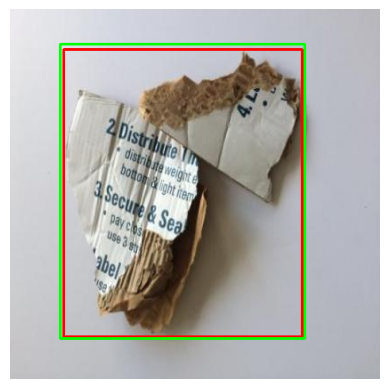

In [132]:
print("ground truth:", ground_truth)
print("predicted:   ", pred_box)
iou = ops.box_iou(ground_truth, pred_box)
print(iou.item()*100, "%")

img_iou = img.copy()
cv2.rectangle(img_iou, (x1_combined, y1_combined), (x2_combined, y2_combined), (255, 0, 0), 2)  # Ground truth
cv2.rectangle(img_iou, 
              (int(pred_box[0][0].item()), int(pred_box[0][1].item())), 
              (int(pred_box[0][2].item()), int(pred_box[0][3].item())), 
              (0, 255, 0), 2)  # Predicted

plt.imshow(img_iou)
plt.axis("off")
plt.show()

In [123]:
pred_box[0][0].item()

56.596073150634766